In [1]:
# Importa la librería "pandas" para analizar los datos, la "matplotlib" para creación de gráficas/tablas y carga el archivo ".csv" con todas las líneas de la serie.
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/the-office_lines.csv")

In [2]:
# Explora los archivos en la dirección del ".csv" y verifica que están disponibles en esa ubicación.
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
# Proporciona una vista previa del contenido del ".csv", en este caso, todas las líneas de la serie.
df.head()

,Unnamed: 0,Character,Line,Season,Episode_Number
0,0,Michael,All right Jim. Your quarterlies look very goo...,1,1
1,1,Jim,"Oh, I told you. I couldn’t close it. So…",1,1
2,2,Michael,So you’ve come to the master for guidance? Is...,1,1
3,3,Jim,"Actually, you called me in here, but yeah.",1,1
4,4,Michael,"All right. Well, let me show you how it’s don...",1,1


In [13]:
# Renombra las columnas y, posteriormente, enseña una previsualización de los mismos datos.
df.rename(columns={"Unnamed: 0": "ID"}, inplace=True)
print(df.head())

   ID Character                                               Line  Season  \
0   0   Michael   All right Jim. Your quarterlies look very goo...       1   
1   1       Jim           Oh, I told you. I couldn’t close it. So…       1   
2   2   Michael   So you’ve come to the master for guidance? Is...       1   
3   3       Jim         Actually, you called me in here, but yeah.       1   
4   4   Michael   All right. Well, let me show you how it’s don...       1   

   Episode_Number  
0               1  
1               1  
2               1  
3               1  
4               1  


La serie *The Office* es bien conocida por todos por su humor "antipolíticamente correcto" y cómo sus personajes transforman un trabajo de oficina normal y corriente en una locura digna de formar parte de un circo.

Nadie se salva: Michael Scott, con sus malentendidos (bien entendidos), Dwight Schrute, el rey de los momentos incómodos y que convierte cada conversación en una posible futura venta, o Jim Halpert, el genio de las bromas y de romper, constantemente la cuarta pared, entre otros, hacen de la serie un espectáculo en el que, a los 5 minutos de empezar el episodio, ya no sabes que está pasando.

Pero si hay algo característico de *The Office* es la mítica frase que Steve Carell, durante una toma falsa, pensó que "esta podría quedar bien": ***That's What She Said***.

Y tan bien que quedó, solo hace falta que un colega suelte algo para sacarlo de contexto y acompañarlo con un ***That's What She Said***:
- En una hamburguesería, comiéndote una burger XXL: No me entra toda (***That's What She Said***).

- Montando un mueble: Esto no entra (***That's What She Said***).

- Preparando una tarta de cumpleaños: Hace falta más crema (***That's What She Said***).

Cualquier momento es bueno para entonar al bueno de Michael Scott pero lo que mucha gente se pregunta es: ¿tantas veces se repitió la frase como para calar en la gente de esa manera, o con un par ya fue suficiente (***That's What She Said***)?

In [5]:
# Cuenta el número de variables de las columnas "Season" (temporada) y "Episode_Number" (número de capítulo) y suma el total de episodios.
episodes = df.groupby("Season")["Episode_Number"].nunique()
episodes = df.groupby("Season").nunique()
#print(episodes)
total_episodes = episodes['Episode_Number'].sum()
print(total_episodes)

184


In [12]:
# Enumera cuantas veces se ha dicho, en toda la serie, la frase "That's what she said".
twss = df[df['Line'].str.contains("that’s what she said",case=False,regex=False)]
print(len(twss.index))

34


En total hubo **184** episodios de **The Office**, exceptuando especiales o episodios piloto, y de entre los cuáles, la famosa frase se dijo un total de **34** veces.

In [11]:
# Imprime, únicamente, las líneas exactas en las que se menciona "That's what she said".
twss.head()

,ID,Character,Line,Season,Episode_Number
2529,2694,Michael,That’s what she said. Pam?,2,2
2575,2740,Jim,Does that include ‘That’s What She Said’?,2,2
2578,2743,Michael,THAT’S WHAT SHE SAID!,2,2
5294,5634,Michael,"A, that’s what she said, and B, I wanted it t...",2,10
6287,6675,Dwight,That’s what she said.,2,12


In [8]:
# Señala en que episodios de qué temporada se ha dicho la frase.
count_per_episode = twss.groupby(["Season","Episode_Number"])["Character"].count().reset_index(name="count")
print(count_per_episode)

print("\n\nNumber of episodes with this line:")
print(len(count_per_episode.index))

    Season  Episode_Number  count
0        2               2      3
1        2              10      1
2        2              12      2
3        2              17      1
4        2              21      1
5        3               1      1
6        3               5      1
7        3              10      1
8        3              12      1
9        3              17      2
10       3              20      1
11       3              22      1
12       4               2      1
13       4               4      1
14       4               7      2
15       4               9      1
16       4              12      1
17       5               1      1
18       5               4      1
19       5               5      1
20       5               6      1
21       5              17      1
22       6              18      1
23       7               8      1
24       7              13      1
25       7              15      1
26       7              21      1
27       9               5      1
28       9    

In [9]:
# Identifica y muestra los episodios en los que más de un personaje ha dicho la frase y cuántas veces ha sido dicha en cada episodio.
count_per_episode = twss.groupby(["Season","Episode_Number"])["Character"].count().reset_index(name="count")
more_than_once = count_per_episode[count_per_episode['count']>0]
print(more_than_once)

    Season  Episode_Number  count
0        2               2      3
1        2              10      1
2        2              12      2
3        2              17      1
4        2              21      1
5        3               1      1
6        3               5      1
7        3              10      1
8        3              12      1
9        3              17      2
10       3              20      1
11       3              22      1
12       4               2      1
13       4               4      1
14       4               7      2
15       4               9      1
16       4              12      1
17       5               1      1
18       5               4      1
19       5               5      1
20       5               6      1
21       5              17      1
22       6              18      1
23       7               8      1
24       7              13      1
25       7              15      1
26       7              21      1
27       9               5      1
28       9    

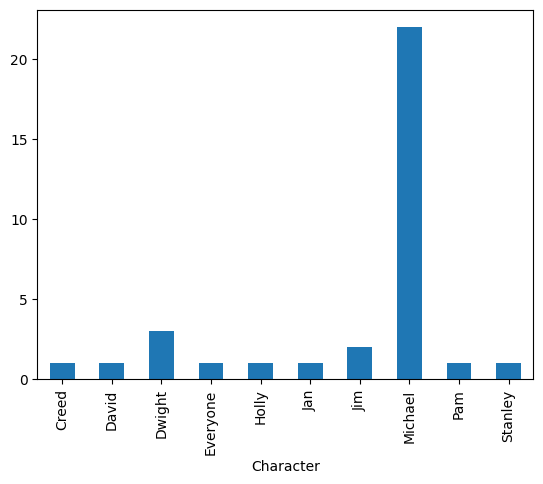

In [10]:
# Genera una gráfica que representa la cantidad de líneas de diálogo que ha dicho cada personaje que ha pronunciado la frase en la serie.
who = twss.groupby("Character")["Line"].count()
ax = who.plot.bar()

En total, de entre esas 34 veces, y como era de esperar, el que más la repitió fue **Michael Scott**, con un total de **22**, muy delante del segundo que más la dijo, **Dwight**, **3 veces**, seguido de **Jim**, **2**, y de **Creed**, **David**, **Holly**, **Jan**, **Pam**, **Stanley** y **todo el casting durante un episodio** que la dijo al unísono, **1 vez**.